# 0 - IMPORT LIBRARIES

In [1]:
import keras_cv as kcv
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

import os
import random
import numpy as np
import math
import matplotlib.pyplot as plt


# Random seed for reproducibility
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# 1 - LOAD DATA

In [2]:
data = np.load('/kaggle/input/an2dl-homework-1-dataset/training_set_CLEANED_V2.npz')

X = data['images']
y = data['labels']

print(X.shape)
print(y.shape)

(11951, 96, 96, 3)
(11951, 1)


# 2 - PLOT DATA DISTRIBUTION

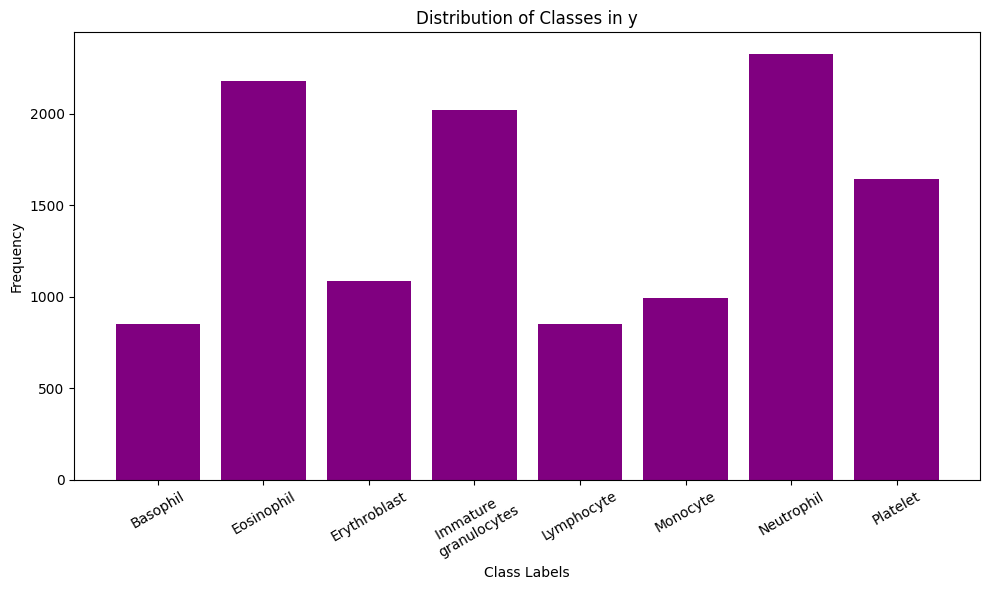

In [18]:
unique_labels, label_counts = np.unique(y, return_counts=True)
labels = ['Basophil', 'Eosinophil', 'Erythroblast', 'Immature  \ngranulocytes',
          'Lymphocyte', 'Monocyte', 'Neutrophil', 'Platelet']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, label_counts, color='purple')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in y')
plt.xticks(ticks=unique_labels, labels=[labels[i] for i in unique_labels], rotation=30, ha='center')  # Map class names
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('class_distribution2.png')
plt.show()

# 3 - OVERSAMPLING 

In [5]:
n_max = 2330
augmentation = tf.keras.Sequential([
    tfkl.RandomTranslation(height_factor=(-0.15, 0.15),
    width_factor=(-0.15, 0.15),
    fill_mode="nearest",
    interpolation="bilinear",
    seed=seed,
    fill_value=0.0,
    data_format=None),
    tfkl.RandomFlip("horizontal", seed = seed),
    tfkl.RandomRotation(factor=0.2, seed = seed)
    ], name='preprocessing')

0
(2330, 96, 96, 3)
(2330, 1)
(2330, 96, 96, 3)
(2330, 1)
1
(2330, 96, 96, 3)
(2330, 1)
(4660, 96, 96, 3)
(4660, 1)
2
(2330, 96, 96, 3)
(2330, 1)
(6990, 96, 96, 3)
(6990, 1)
3
(2330, 96, 96, 3)
(2330, 1)
(9320, 96, 96, 3)
(9320, 1)
4
(2330, 96, 96, 3)
(2330, 1)
(11650, 96, 96, 3)
(11650, 1)
5
(2330, 96, 96, 3)
(2330, 1)
(13980, 96, 96, 3)
(13980, 1)
6
(2330, 96, 96, 3)
(2330, 1)
(16310, 96, 96, 3)
(16310, 1)
7
(2330, 96, 96, 3)
(2330, 1)
(18640, 96, 96, 3)
(18640, 1)


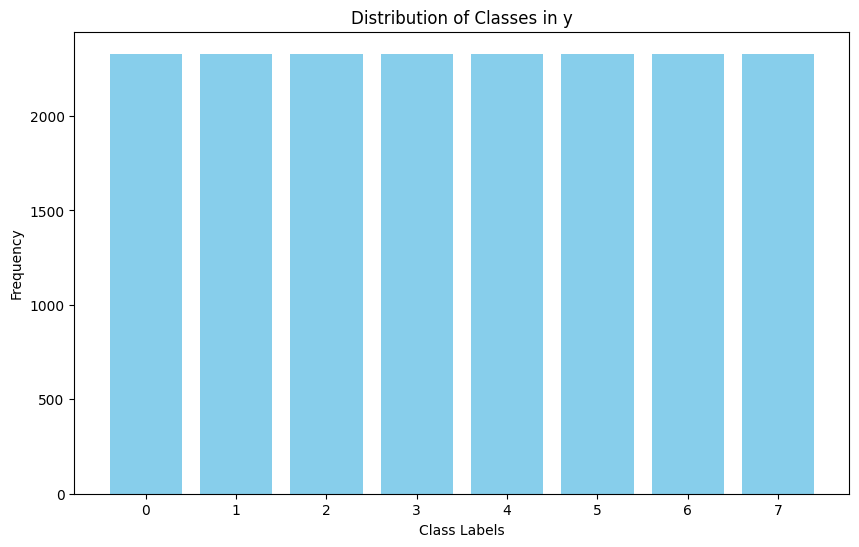

In [6]:
X_new = np.empty((0, 96, 96, 3))
y_new = np.empty((0, 1))
label_less = []
for i in unique_labels:
    print(i)
    X_aux = []
    y_aux = []
    n=0
    # Iterating through images and labels
    for im, lab in zip(X, y):  # Use zip to iterate through both X and y together
        if lab == i and n<n_max:
            lab_aux=lab
            n+=1
            X_aux.append(im)
            y_aux.append(lab)
    if not n==n_max:
        for k in range(n,n_max):
            X_aux.append(augmentation(X_aux[(k-n)%label_counts[i]]))
            y_aux.append(lab_aux)
    # Convert to numpy arrays (optional, if you want to check shape)
    X_aux = np.array(X_aux)
    y_aux = np.array(y_aux)

    X_new = np.concatenate((X_new, X_aux), axis=0)  # Concatenate images
    y_new = np.concatenate((y_new, y_aux), axis=0)  # Concatenate labels
    # Print the shape of the extracted images and labels
    
print(X_new.shape)
print(y_new.shape)    
unique_labels1, label_counts1 = np.unique(y_new, return_counts=True)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(unique_labels1, label_counts1, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in y')
plt.xticks(unique_labels1)  # Ensure that each class label is shown on the x-axis
plt.show()

# 4 - SAVING NEW DATA

In [7]:
np.save('X',X_new)
np.save('y',y_new)
print('DONE')

DONE


In [8]:
from datetime import datetime

!zip {'Dataset_18640_oversampled'} X.npy y.npy

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: X.npy (deflated 74%)
  adding: y.npy (deflated 100%)
